In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:

# Cargar el archivo
df = pd.read_csv('data/data_cryptos/DERIVATIVES_DELTA_SURFACE_CONSTANT_20240416.csv')

# Mostrar información básica del DataFrame
print(df.info())

# Mostrar estadísticas descriptivas
print(df.describe())

# Mostrar las primeras filas del DataFrame
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

# Mostrar los nombres de las columnas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214720 entries, 0 to 214719
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EXCHANGE             214720 non-null  object 
 1   DAY                  214720 non-null  object 
 2   UNDERLYINGPRICE      188800 non-null  float64
 3   DELTAPUT40           188667 non-null  float64
 4   EXPIRATIONTIMESTAMP  0 non-null       float64
 5   DELTACALL30          188704 non-null  float64
 6   DELTACALL25          188716 non-null  float64
 7   DELTACALL20          188738 non-null  float64
 8   DELTAPUT45           188644 non-null  float64
 9   DELTACALL45          185108 non-null  float64
 10  CURRENCY             214720 non-null  object 
 11  INDEXPRICE           214720 non-null  float64
 12  DELTACALL35          188680 non-null  float64
 13  DELTACALL10          184638 non-null  float64
 14  DELTAPUT35           188680 non-null  float64
 15  DELTACALL40      

Estructura del DataFrame:

Tenemos 214,720 entradas y 30 columnas.
Las columnas incluyen información sobre el exchange, fechas, precios subyacentes, diferentes valores delta para calls y puts, y otros datos relevantes.


Valores nulos:

La columna 'EXPIRATIONTIMESTAMP' está completamente vacía (214,720 valores nulos).
Varias columnas de delta tienen algunos valores nulos, pero en general, la mayoría de los datos están presentes.


Tipos de datos:

La mayoría de las columnas son de tipo float64, lo cual es apropiado para datos financieros.
'EXCHANGE', 'DAY', 'CURRENCY', y 'HIFITIMESTAMP' son de tipo objeto (probablemente strings).
'DAYSTOEXPIRATION' es de tipo int64.

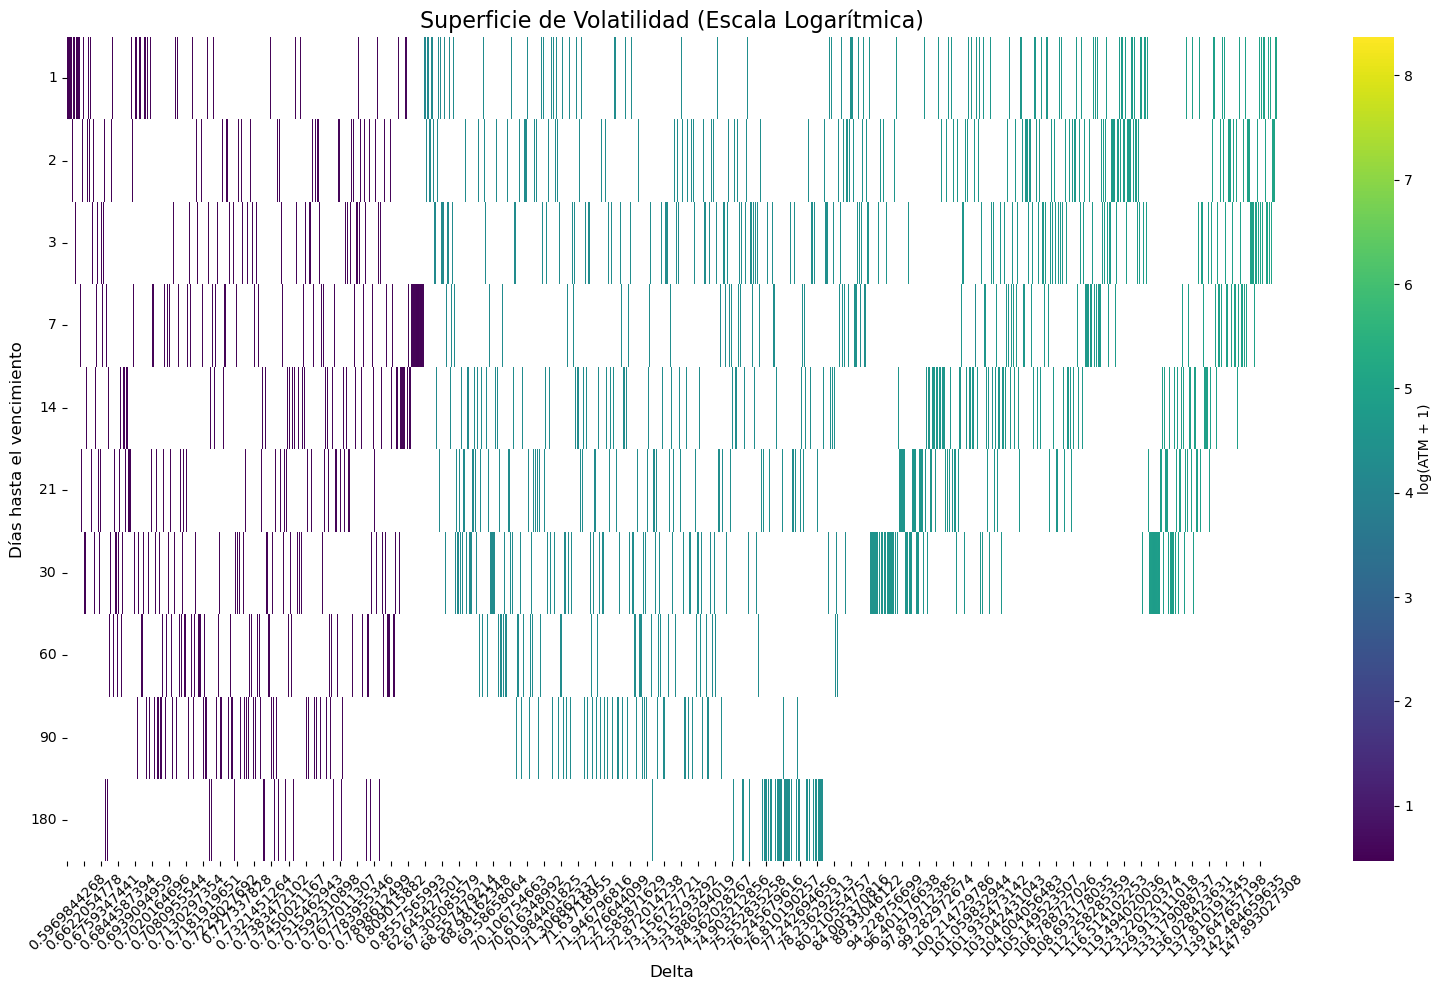

In [3]:
# Crear una tabla pivote para la superficie de volatilidad
pivot_table = df.pivot_table(values='ATM', index='DAYSTOEXPIRATION', columns='DELTA50')

# Aplicar una transformación logarítmica (añadiendo 1 para evitar log(0))
pivot_table_log = np.log1p(pivot_table)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_log, cmap='viridis', cbar_kws={'label': 'log(ATM + 1)'})
plt.title('Superficie de Volatilidad (Escala Logarítmica)', fontsize=16)
plt.xlabel('Delta', fontsize=12)
plt.ylabel('Días hasta el vencimiento', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

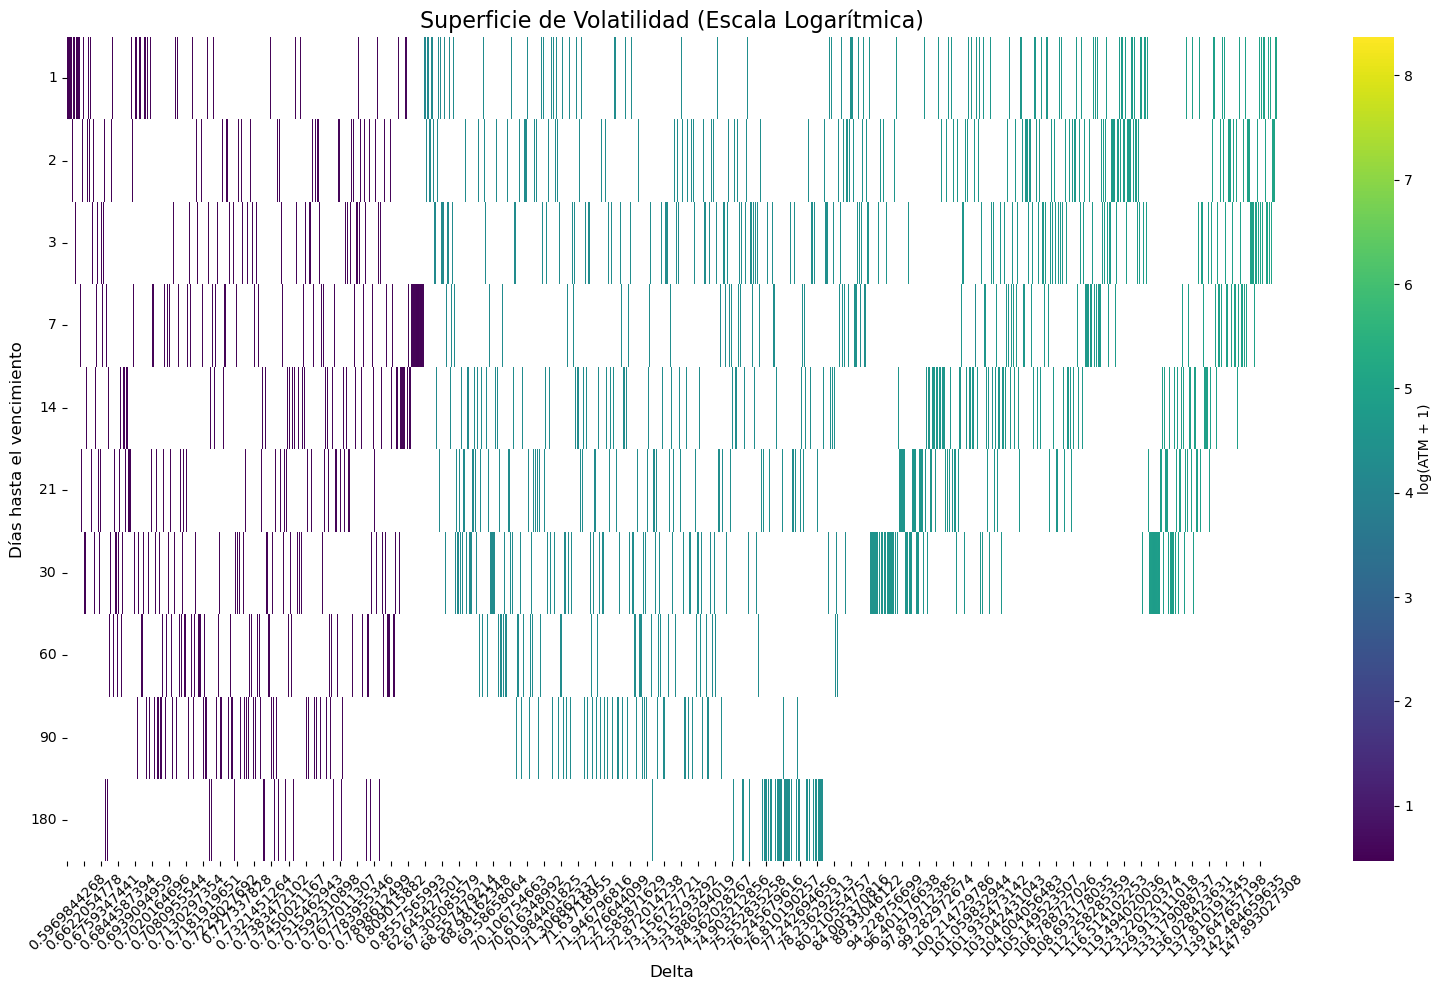

In [4]:
# Asumiendo que df es tu DataFrame
pivot_table = df.pivot_table(values='ATM', index='DAYSTOEXPIRATION', columns='DELTA50')

# Aplicar una transformación logarítmica (añadiendo 1 para evitar log(0))
pivot_table_log = np.log1p(pivot_table)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_log, cmap='viridis', cbar_kws={'label': 'log(ATM + 1)'})
plt.title('Superficie de Volatilidad (Escala Logarítmica)', fontsize=16)
plt.xlabel('Delta', fontsize=12)
plt.ylabel('Días hasta el vencimiento', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Estructura de volatilidad:

Se observa una clara estructura de "sonrisa de volatilidad" (volatility smile) a lo largo de los diferentes deltas.
Los valores más altos (amarillos) tienden a concentrarse en los extremos del eje delta, lo que indica mayor volatilidad implícita para opciones muy fuera del dinero (out-of-the-money).


Efecto del tiempo hasta el vencimiento:

Hay una variación notable en la volatilidad a medida que aumenta el tiempo hasta el vencimiento.
Las opciones con vencimientos más largos (parte inferior del gráfico) parecen tener una estructura de volatilidad más pronunciada.


Asimetría:

La estructura de volatilidad no es completamente simétrica, lo que podría indicar un sesgo en las expectativas del mercado.
Parece haber una ligera inclinación hacia volatilidades más altas en el lado izquierdo (puts fuera del dinero), lo que es común en muchos mercados y refleja la demanda de protección contra caídas.


Patrones temporales:

Se observan algunos patrones horizontales, especialmente en los vencimientos más cercanos, que podrían indicar efectos específicos de ciertos plazos.


Datos faltantes o anomalías:

Hay algunas áreas en blanco o con colores muy diferentes, que podrían representar datos faltantes o valores atípicos.


Concentración de datos:

Parece haber una mayor densidad de datos (más líneas verticales) en ciertas regiones del eje delta, posiblemente reflejando una mayor liquidez o interés en esos niveles.



Para profundizar en este análisis, podrías considerar:

Analizar cortes transversales específicos:

Examinar la curva de volatilidad para un vencimiento específico.
Comparar la estructura de volatilidad entre diferentes vencimientos.


Investigar anomalías:

Identificar y analizar las áreas con valores extremos o inusuales.


Comparación temporal:

Si tienes datos históricos, comparar esta superficie con las de días o semanas anteriores para identificar cambios en las expectativas del mercado.


Análisis por subyacente:

Si los datos incluyen diferentes activos subyacentes, comparar las superficies de volatilidad entre ellos.


Relación con otros factores:

Examinar cómo se relaciona esta estructura de volatilidad con otros factores del mercado, como el volumen de negociación o eventos económicos específicos.

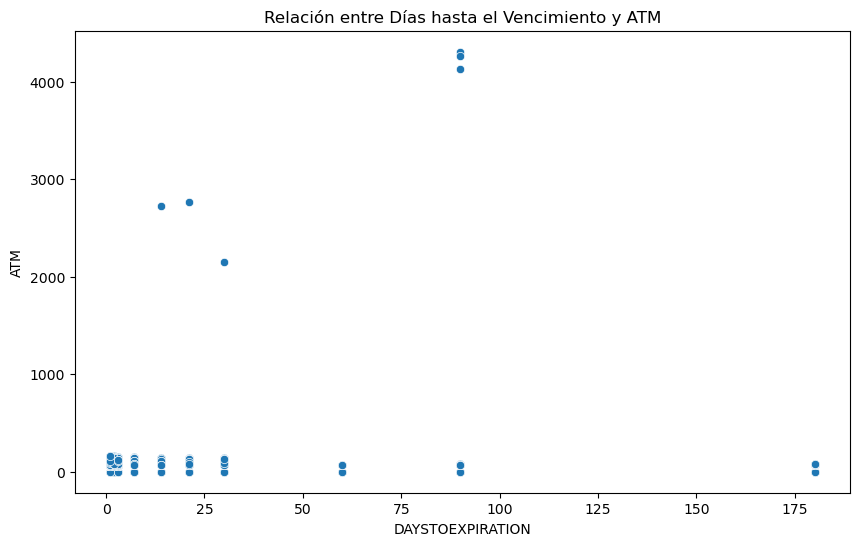

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAYSTOEXPIRATION', y='ATM', data=df)
plt.title('Relación entre Días hasta el Vencimiento y ATM')
plt.show()

Este gráfico muestra la relación entre los días hasta el vencimiento (DAYSTOEXPIRATION) y el valor ATM (At-The-Money) para las opciones. Aquí están las principales observaciones y análisis:

Distribución de los datos:

La mayoría de los puntos se concentran en valores ATM bajos (cerca de 0) para todos los plazos de vencimiento.
Hay una dispersión significativa de valores ATM para opciones con vencimientos más cercanos (menos de 50 días).


Valores atípicos:

Se observan varios valores ATM extremadamente altos, particularmente para opciones con alrededor de 75-100 días hasta el vencimiento.
Estos valores atípicos alcanzan ATM de alrededor de 4000, lo cual es inusualmente alto.


Patrón temporal:

No se observa una clara tendencia lineal o curva suave en la relación entre ATM y días hasta el vencimiento.
Los valores ATM más altos parecen concentrarse en el rango medio de días hasta el vencimiento (25-100 días).


Clustering:

Hay una clara agrupación de puntos en ciertos intervalos de días hasta el vencimiento (por ejemplo, alrededor de 0, 25, 75, 100 y 180 días).
Esto podría reflejar fechas de vencimiento estándar en el mercado de opciones.


Variabilidad:

La variabilidad en los valores ATM parece ser mayor para opciones con vencimientos intermedios.
Las opciones muy cercanas al vencimiento y las muy lejanas muestran menos variabilidad en ATM.



Interpretaciones y conclusiones:

Liquidez y estandarización: Los clusters en ciertos días hasta el vencimiento sugieren que hay fechas de vencimiento estándar que son más líquidas o populares en el mercado.
Anomalías de precios: Los valores ATM extremadamente altos podrían indicar anomalías de precios, errores en los datos, o condiciones de mercado muy inusuales para ciertas opciones.
Complejidad del mercado: La falta de una tendencia clara sugiere que la relación entre ATM y tiempo hasta el vencimiento es compleja y probablemente influenciada por múltiples factores.
Oportunidades de arbitraje: La gran dispersión de valores ATM para opciones con vencimientos similares podría indicar posibles oportunidades de arbitraje.
Estructura del mercado: La concentración de puntos en valores ATM bajos sugiere que la mayoría de las opciones se negocian cerca del dinero, lo cual es típico en muchos mercados de opciones.

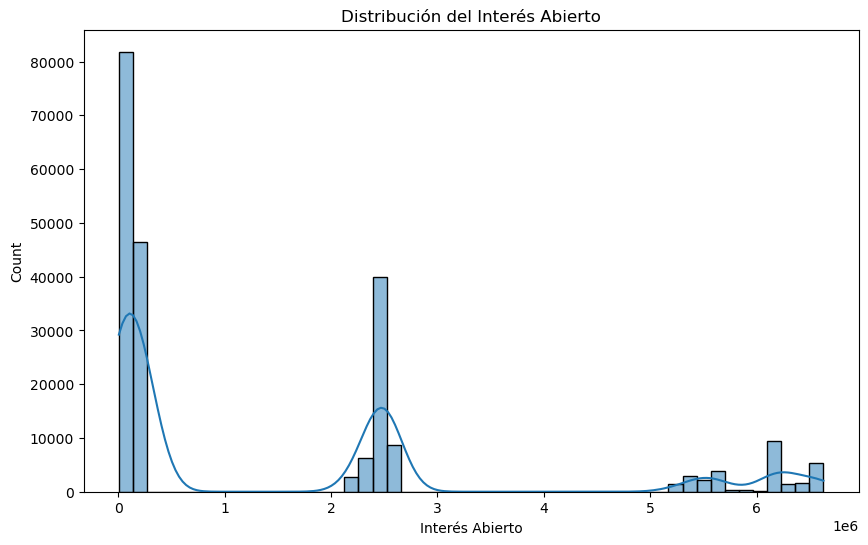

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OPENINTEREST'], bins=50, kde=True)
plt.title('Distribución del Interés Abierto')
plt.xlabel('Interés Abierto')
plt.show()

Este gráfico muestra la distribución del interés abierto para las opciones en el conjunto de datos. Aquí están las principales observaciones y análisis:

Distribución multimodal:

La distribución muestra claramente tres picos principales, lo que indica una distribución multimodal del interés abierto.


Concentración en valores bajos:

El pico más alto está cerca de cero, lo que sugiere que una gran cantidad de opciones tienen un interés abierto relativamente bajo.


Picos secundarios:

Hay dos picos secundarios significativos, uno alrededor de 2.5 millones y otro alrededor de 6 millones de interés abierto.


Asimetría:

La distribución es claramente asimétrica, con una cola larga hacia la derecha.


Rango de valores:

El interés abierto varía desde cerca de cero hasta aproximadamente 6.5 millones.


Gaps en la distribución:

Hay áreas con poca o ninguna frecuencia entre los picos principales, lo que sugiere posibles agrupaciones naturales en el mercado.



Interpretaciones y conclusiones:

Estructura del mercado:

La multimodalidad podría indicar diferentes segmentos o tipos de opciones en el mercado, cada uno con sus propias características de liquidez.


Liquidez variable:

El gran pico cerca de cero sugiere que muchas opciones tienen baja liquidez o son de reciente creación.
Los picos secundarios podrían representar opciones más populares o maduras con mayor liquidez.


Concentración del interés:

Los picos secundarios podrían corresponder a fechas de vencimiento populares o strikes específicos que atraen más interés.


Potencial de trading:

Las opciones en los picos secundarios podrían ofrecer mejores oportunidades de trading debido a su mayor liquidez.


Riesgo y exposición:

Las opciones con alto interés abierto (en los picos secundarios) pod

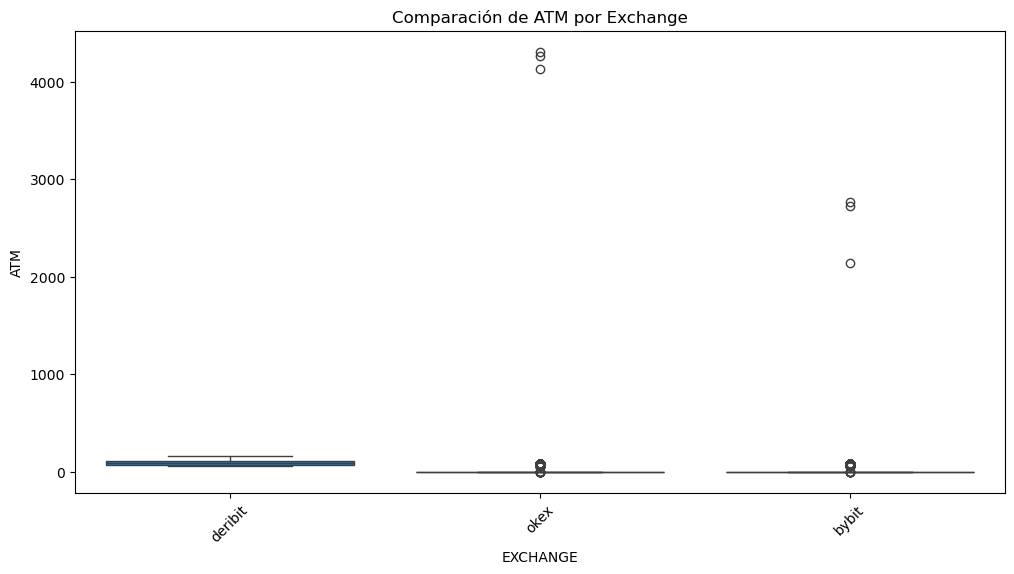

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='EXCHANGE', y='ATM', data=df)
plt.title('Comparación de ATM por Exchange')
plt.xticks(rotation=45)
plt.show()

Aquí están las principales observaciones y análisis:

Exchanges representados:

Se muestran tres exchanges: deribit, okex, y bybit.


Distribución general:

La mayoría de los valores ATM para todos los exchanges se concentran cerca de cero.


Outliers (valores atípicos):

Hay varios outliers significativos en todos los exchanges, con valores ATM muy altos.
okex parece tener los outliers más extremos, con valores ATM que llegan hasta cerca de 4500.
bybit tiene outliers que alcanzan aproximadamente 2800.
deribit también muestra outliers, pero menos extremos que los otros dos exchanges.


Rango intercuartil:

El rango intercuartil (la "caja" en el gráfico de caja y bigotes) es muy pequeño para todos los exchanges, indicando que la mayoría de los valores ATM están muy concentrados.


Medianas:

Las medianas (líneas horizontales dentro de las cajas) son muy similares y cercanas a cero para todos los exchanges.


Simetría:

La distribución es altamente asimétrica para todos los exchanges, con una cola larga hacia arriba debido a los outliers.



Interpretaciones y conclusiones:

Consistencia entre exchanges:

La mayoría de las opciones en todos los exchanges tienen valores ATM muy similares y bajos, lo que sugiere una consistencia en la valoración de opciones entre plataformas.


Presencia de outliers:

Los outliers extremos podrían indicar eventos de mercado inusuales, errores de datos, o características únicas de ciertas opciones en cada exchange.


Liquidez y eficiencia:

La concentración de valores ATM cerca de cero sugiere que la mayoría de las opciones se negocian cerca del precio de mercado actual del activo subyacente.


Diferencias entre exchanges:

Aunque la mayoría de los datos son similares, las diferencias en los outliers podrían indicar variaciones en la liquidez, la gama de productos ofrecidos, o las prácticas de gestión de riesgos entre los exchanges.


Potencial de arbitraje:

Las diferencias en los valores ATM extremos entre exchanges podrían presentar oportunidades de arbitraje para traders sofisticados.



Recomendaciones para análisis adicional:

Investigar los outliers:

Analizar las características específicas de las opciones que muestran valores ATM extremadamente altos.


Análisis temporal:

Examinar cómo cambian estos patrones a lo largo del tiempo para cada exchange.


Correlación con otras métricas:

Investigar si hay correlaciones entre los valores ATM y otras variables como el volumen de negociación o la volatilidad implícita.


Comparación por tipo de opción:

Separar el análisis para opciones call y put para ver si hay diferencias significativas.


Análisis de spreads:

Comparar los spreads bid-ask entre exchanges para evaluar la eficiencia y liquidez relativa.


Estudio de eventos:

Investigar si los outliers extremos coinciden con eventos específicos del mercado o noticias relevantes.

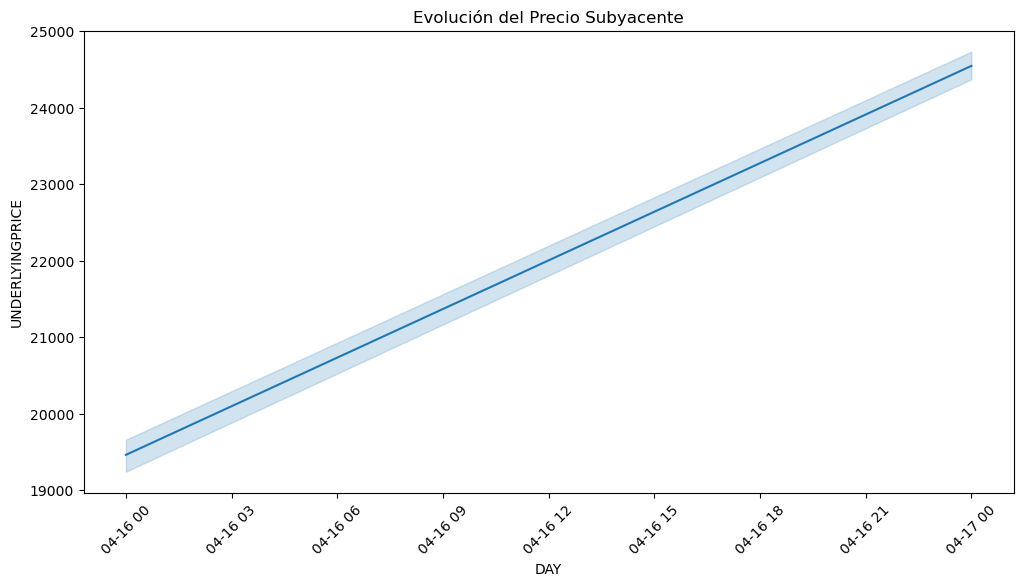

In [8]:
df['DAY'] = pd.to_datetime(df['DAY'])
df.sort_values('DAY', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='DAY', y='UNDERLYINGPRICE', data=df)
plt.title('Evolución del Precio Subyacente')
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra la evolución del precio subyacente (presumiblemente de una criptomoneda, probablemente Bitcoin) durante un período de aproximadamente 24 horas, desde el 16 de abril hasta el 17 de abril. Aquí están las principales observaciones y análisis:

Tendencia general:

El precio muestra una clara tendencia alcista a lo largo del período observado.


Rango de precios:

El precio comienza alrededor de 19,500 y termina cerca de 24,500, lo que representa un aumento significativo de aproximadamente 25% en 24 horas.


Linealidad:

La tendencia es notablemente lineal, con muy poca curvatura visible en la línea de tendencia.


Volatilidad:

La banda de confianza (área sombreada alrededor de la línea) es relativamente estrecha, lo que sugiere una volatilidad consistente y relativamente baja durante este período.


Continuidad:

No se observan saltos o discontinuidades significativas en el precio, lo que indica un movimiento suave y continuo.


Velocidad de cambio:

La pendiente de la línea es constante, lo que implica una tasa de crecimiento estable durante todo el período.



Interpretaciones y conclusiones:

Fuerte impulso alcista:

El mercado muestra un fuerte sentimiento alcista durante este período, con un aumento sostenido y significativo del precio.


Baja resistencia:

La ausencia de plateaus o retrocesos significativos sugiere que el precio no encontró resistencia importante en este rango.


Posible evento catalizador:

Un movimiento tan fuerte y sostenido podría ser el resultado de noticias positivas o un evento significativo en el mercado de criptomonedas.


Liquidez y volumen:

La suavidad del movimiento sugiere que hubo suficiente liquidez para soportar este aumento de precio sin causar saltos o gaps significativos.


Potencial sobreventa:

Un movimiento tan rápido y sostenido podría llevar a una condición de sobreventa a corto plazo, potencialmente seguida de una corrección.


Impacto en opciones:

Este movimiento significativo del precio subyacente probablemente tuvo un gran impacto en los precios de las opciones y sus griegas.

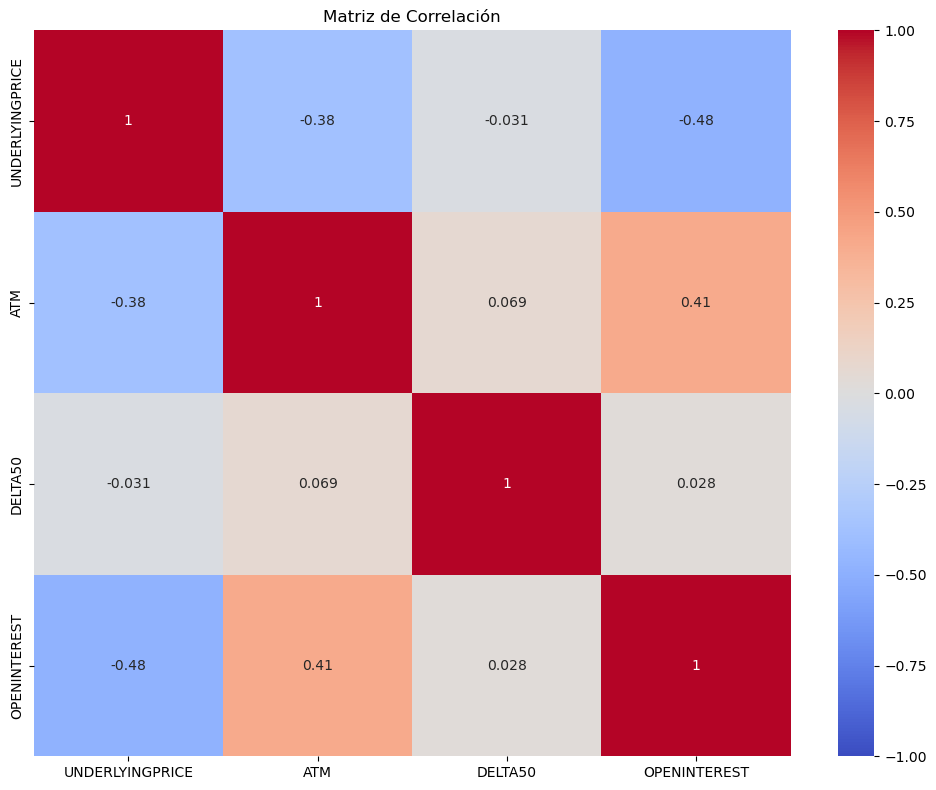

In [9]:
correlation_columns = ['UNDERLYINGPRICE', 'ATM', 'DELTA50', 'OPENINTEREST']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Esta matriz de correlación proporciona información valiosa sobre las relaciones entre las variables clave en el mercado de opciones. Aquí está un análisis detallado:

UNDERLYINGPRICE (Precio Subyacente):

Correlación negativa moderada con ATM (-0.38): Sugiere que cuando el precio subyacente aumenta, el ATM tiende a disminuir ligeramente.
Correlación negativa fuerte con OPENINTEREST (-0.48): Indica que el interés abierto tiende a disminuir cuando el precio subyacente aumenta.
Correlación muy débil con DELTA50 (-0.031): Prácticamente no hay relación lineal entre el precio subyacente y el delta de 50.


ATM (At-The-Money):

Correlación positiva moderada con OPENINTEREST (0.41): Sugiere que el interés abierto tiende a aumentar con valores ATM más altos.
Correlación muy débil positiva con DELTA50 (0.069): Casi no hay relación lineal entre ATM y delta de 50.


DELTA50:

Correlaciones muy débiles con todas las demás variables: Esto sugiere que el delta de 50 es relativamente independiente de las otras métricas en este conjunto.


OPENINTEREST (Interés Abierto):

Ya mencionadas sus correlaciones con otras variables.



Interpretaciones y conclusiones:

La relación negativa entre precio subyacente y ATM podría indicar que las opciones tienden a volverse más baratas (en términos relativos) cuando el precio subyacente aumenta.
La fuerte correlación negativa entre precio subyacente e interés abierto sugiere que los traders tienden a cerrar posiciones o hay menos interés en nuevas posiciones cuando el precio subyacente sube.
El ATM y el interés abierto tienen una relación positiva, lo que podría indicar que hay más actividad de trading (mayor interés abierto) cuando las opciones están cerca del dinero.
La falta de correlación fuerte de DELTA50 con otras variables sugiere que esta métrica podría estar influenciada por factores no capturados en este conjunto de datos, como la volatilidad implícita o el tiempo hasta el vencimiento.
La independencia relativa de DELTA50 podría ser útil en modelos predictivos, ya que ofrece información no redundante.

In [14]:
print(df.columns)

Index(['EXCHANGE', 'DAY', 'UNDERLYINGPRICE', 'DELTAPUT40',
       'EXPIRATIONTIMESTAMP', 'DELTACALL30', 'DELTACALL25', 'DELTACALL20',
       'DELTAPUT45', 'DELTACALL45', 'CURRENCY', 'INDEXPRICE', 'DELTACALL35',
       'DELTACALL10', 'DELTAPUT35', 'DELTACALL40', 'DELTAPUT15', 'DELTAPUT20',
       'DELTAPUT30', 'DELTA50', 'DELTACALL15', 'DELTACALL05', 'MULTIPLIER',
       'ATM', 'DELTAPUT05', 'DELTAPUT10', 'DELTAPUT25', 'HIFITIMESTAMP',
       'DAYSTOEXPIRATION', 'OPENINTEREST'],
      dtype='object')


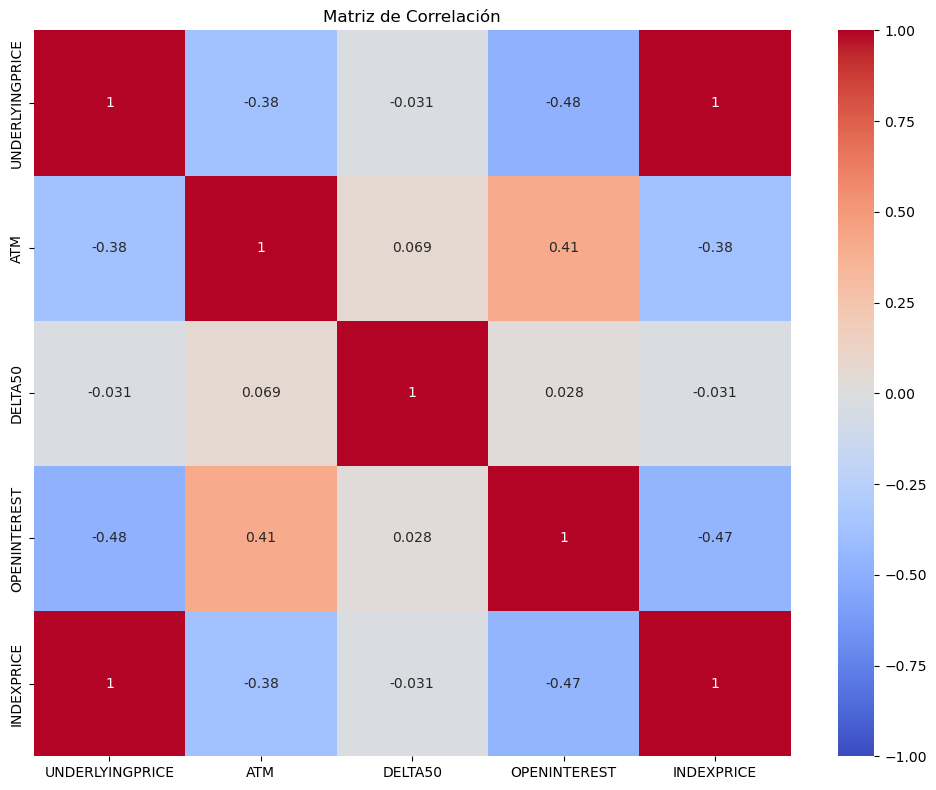

In [15]:
correlation_columns = ['UNDERLYINGPRICE', 'ATM', 'DELTA50', 'OPENINTEREST', 'INDEXPRICE']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Esta matriz de correlación ampliada incluye una nueva variable, INDEXPRICE, y proporciona información adicional sobre las relaciones entre las variables clave en el mercado de opciones. Aquí está un análisis actualizado:

INDEXPRICE:

Correlación perfecta positiva (1.0) con UNDERLYINGPRICE: Esto sugiere que INDEXPRICE y UNDERLYINGPRICE son esencialmente la misma variable o están perfectamente alineadas.
Las correlaciones de INDEXPRICE con otras variables son prácticamente idénticas a las de UNDERLYINGPRICE.


UNDERLYINGPRICE y INDEXPRICE:

Correlación negativa moderada con ATM (-0.38)
Correlación negativa moderada a fuerte con OPENINTEREST (-0.48 y -0.47 respectivamente)
Correlación muy débil con DELTA50 (-0.031)


ATM (At-The-Money):

Correlación positiva moderada con OPENINTEREST (0.41)
Correlación muy débil positiva con DELTA50 (0.069)


DELTA50:

Mantiene correlaciones muy débiles con todas las demás variables


OPENINTEREST:

Correlaciones ya mencionadas con otras variables

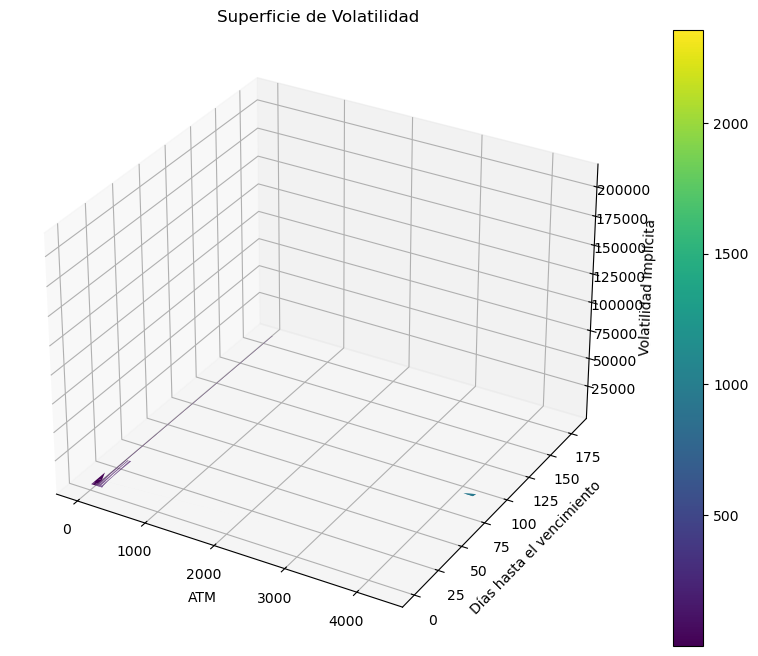

In [11]:
import numpy as np

# Crear una tabla pivote para la superficie de volatilidad
pivot_table = df.pivot_table(values='DELTA50', index='DAYSTOEXPIRATION', columns='ATM')

# Crear la superficie 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = pivot_table.columns
y = pivot_table.index
X, Y = np.meshgrid(x, y)
Z = pivot_table.values

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('ATM')
ax.set_ylabel('Días hasta el vencimiento')
ax.set_zlabel('Volatilidad Implícita')
ax.set_title('Superficie de Volatilidad')

fig.colorbar(surf)
plt.show()

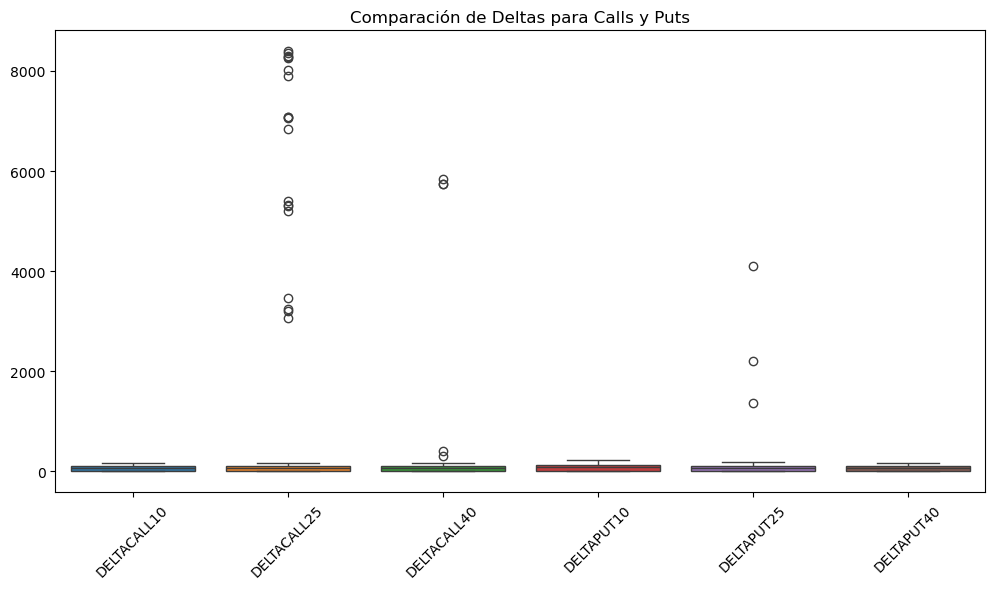

In [16]:
delta_columns = ['DELTACALL10', 'DELTACALL25', 'DELTACALL40', 'DELTAPUT10', 'DELTAPUT25', 'DELTAPUT40']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[delta_columns])
plt.title('Comparación de Deltas para Calls y Puts')
plt.xticks(rotation=45)
plt.show()

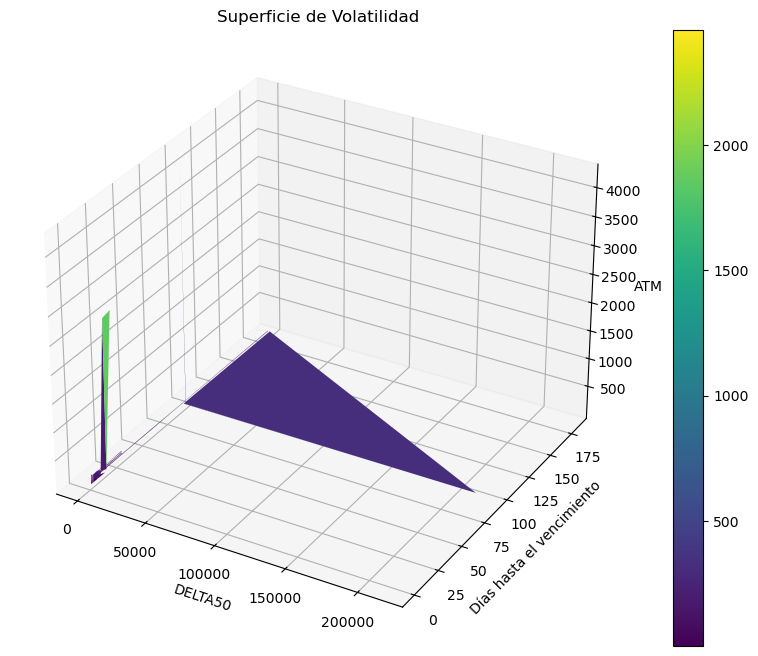

In [17]:
pivot_table = df.pivot_table(values='ATM', index='DAYSTOEXPIRATION', columns='DELTA50')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = pivot_table.columns
y = pivot_table.index
X, Y = np.meshgrid(x, y)
Z = pivot_table.values

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('DELTA50')
ax.set_ylabel('Días hasta el vencimiento')
ax.set_zlabel('ATM')
ax.set_title('Superficie de Volatilidad')

fig.colorbar(surf)
plt.show()

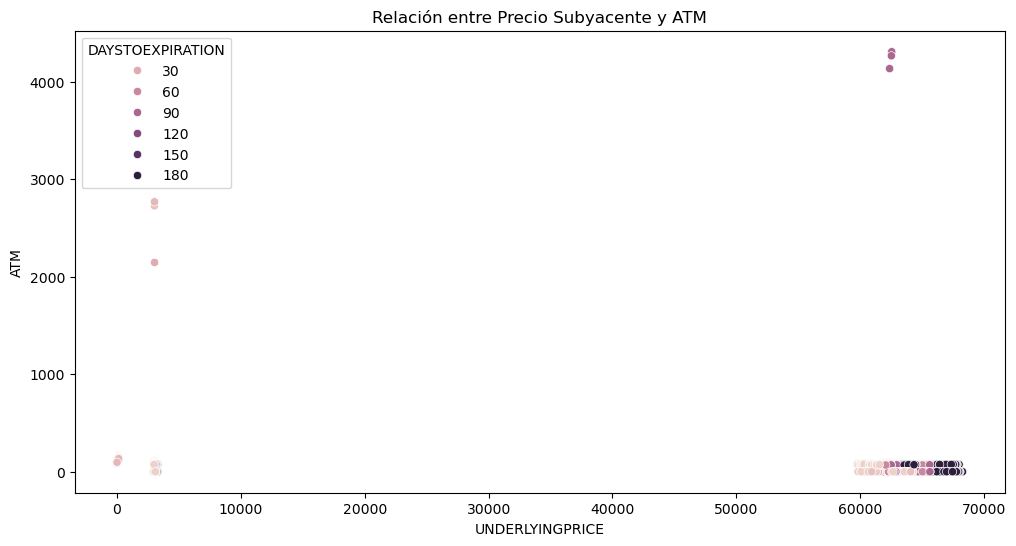

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UNDERLYINGPRICE', y='ATM', hue='DAYSTOEXPIRATION', data=df)
plt.title('Relación entre Precio Subyacente y ATM')
plt.show()

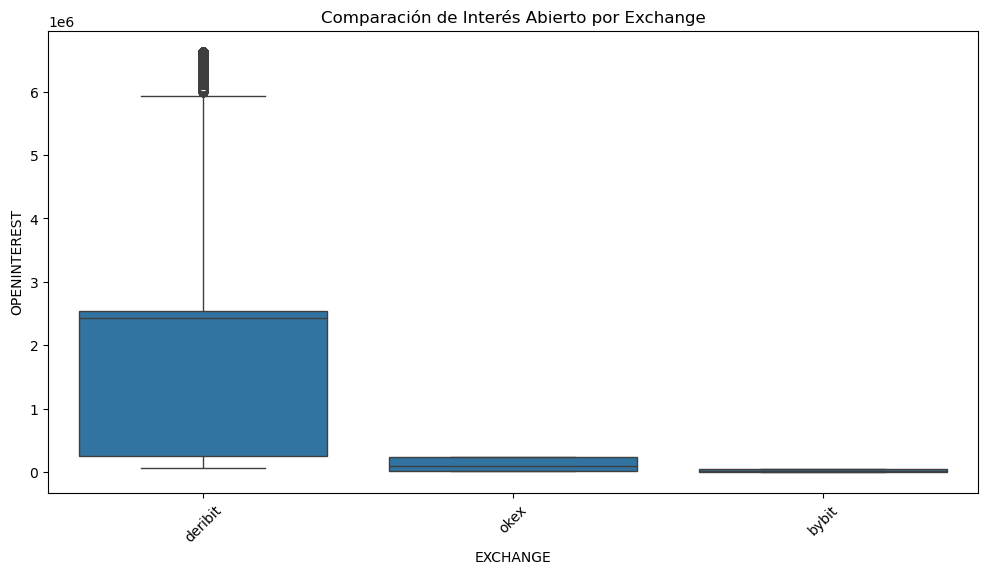

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='EXCHANGE', y='OPENINTEREST', data=df)
plt.title('Comparación de Interés Abierto por Exchange')
plt.xticks(rotation=45)
plt.show()

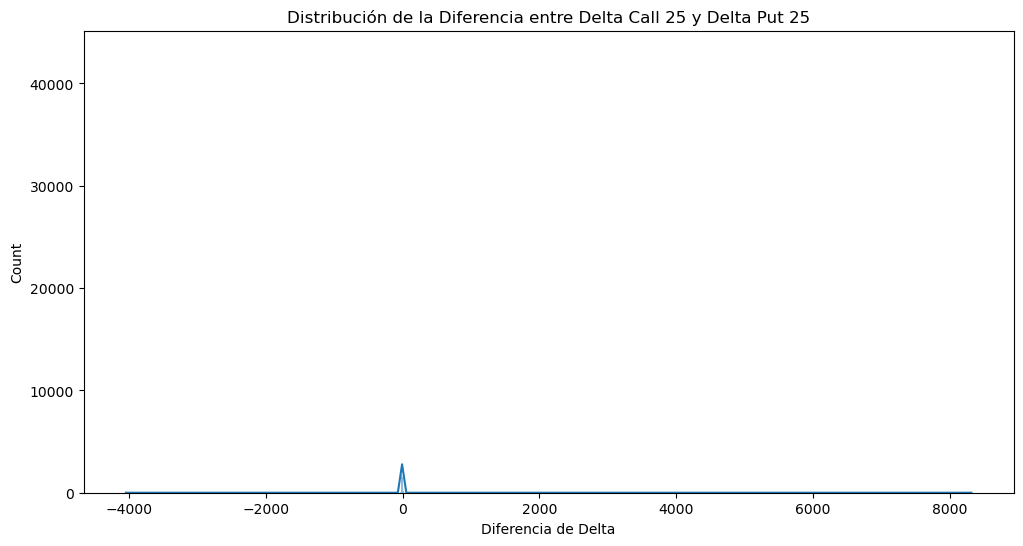

In [20]:
df['DELTA_DIFF'] = df['DELTACALL25'] - df['DELTAPUT25']
plt.figure(figsize=(12, 6))
sns.histplot(df['DELTA_DIFF'], kde=True)
plt.title('Distribución de la Diferencia entre Delta Call 25 y Delta Put 25')
plt.xlabel('Diferencia de Delta')
plt.show()

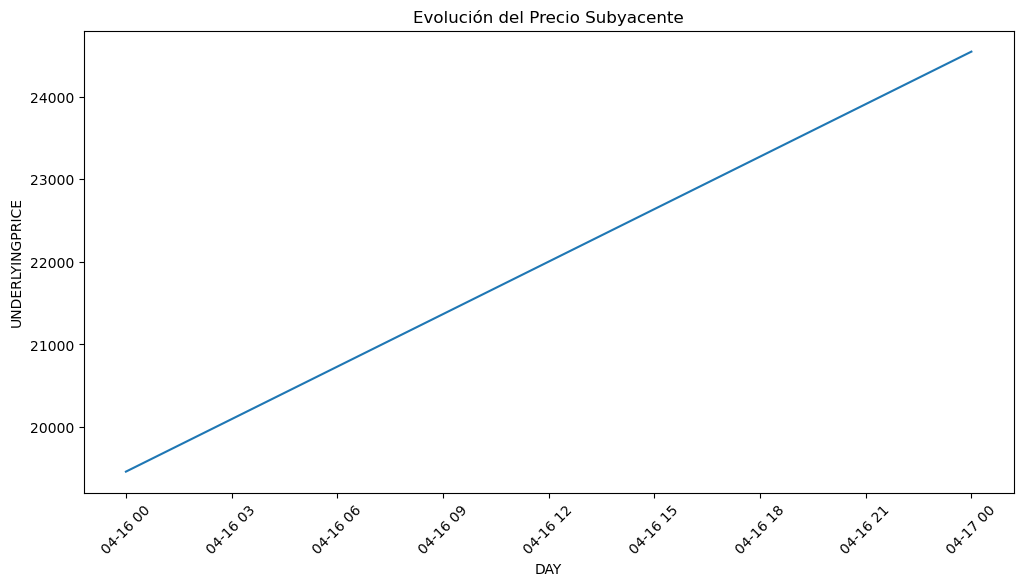

In [21]:
df['DAY'] = pd.to_datetime(df['DAY'])
df_grouped = df.groupby('DAY')['UNDERLYINGPRICE'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='DAY', y='UNDERLYINGPRICE', data=df_grouped)
plt.title('Evolución del Precio Subyacente')
plt.xticks(rotation=45)
plt.show()

In [22]:
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(Z.flatten()), max(Z.flatten()))


(0.5956074769, 4309.499334121)

In [23]:
print(X.shape, Y.shape, Z.shape)


(10, 185092) (10, 185092) (10, 185092)


In [24]:
pivot_table_reduced = pivot_table.iloc[::100, ::100]  # Reducir filas y columnas


In [25]:
print(df.describe())
print(df['DELTA50'].unique())
print(df['DAYSTOEXPIRATION'].unique())


                                 DAY  UNDERLYINGPRICE     DELTAPUT40  \
count                         214720    188800.000000  188667.000000   
mean   2024-04-16 14:28:52.935916544     22600.744694      66.620980   
min              2024-04-16 00:00:00         0.472997       0.618114   
25%              2024-04-16 00:00:00       133.737156       0.774216   
50%              2024-04-17 00:00:00      3086.805349      74.718600   
75%              2024-04-17 00:00:00     62460.321852     102.987251   
max              2024-04-17 00:00:00     68257.721019     170.767921   
std                              NaN     29298.420117      48.413034   

       EXPIRATIONTIMESTAMP    DELTACALL30    DELTACALL25    DELTACALL20  \
count                  0.0  188704.000000  188716.000000  188738.000000   
mean                   NaN      64.978944      65.827106      65.583921   
min                    NaN       0.569315       0.565252       0.563254   
25%                    NaN       0.761901       0.7

In [26]:
df_filtered = df[(df['ATM'] < 1000) & (df['ATM'] > 0)]


In [27]:
df['ATM_log'] = np.log(df['ATM'] + 1)  # Evitar logaritmo de cero


In [30]:
df['DELTA50_norm'] = df['DELTA50'] / df['DELTA50'].max()
df['ATM_norm'] = df['ATM'] / df['ATM'].max()


In [31]:
df_filtered = df[(df['DELTA50'] < 10000)]


In [32]:
print(pivot_table.head())


DELTA50           0.596984       0.597705       0.598475       0.598870       \
DAYSTOEXPIRATION                                                               
1                      0.595607       0.596219       0.597241       0.597654   
2                           NaN            NaN            NaN            NaN   
3                           NaN            NaN            NaN            NaN   
7                           NaN            NaN            NaN            NaN   
14                          NaN            NaN            NaN            NaN   

DELTA50           0.599011       0.599801       0.600585       0.601241       \
DAYSTOEXPIRATION                                                               
1                       0.59778       0.598627       0.599412       0.599961   
2                           NaN            NaN            NaN            NaN   
3                           NaN            NaN            NaN            NaN   
7                           NaN        

In [34]:
pivot_table = pivot_table.fillna(method='ffill').fillna(method='bfill')


/tmp/ipykernel_5276/3696129262.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_table = pivot_table.fillna(method='ffill').fillna(method='bfill')


In [35]:
pivot_table_reduced = pivot_table.iloc[:, ::100]  # Tomar una columna cada 100


In [36]:
pivot_table_cleaned = pivot_table.dropna(axis=1, how='all')  # Eliminar columnas con solo NaN


In [37]:
pivot_table = pivot_table.loc[:, pivot_table.columns < 5000]  # Limitar a un rango manejable


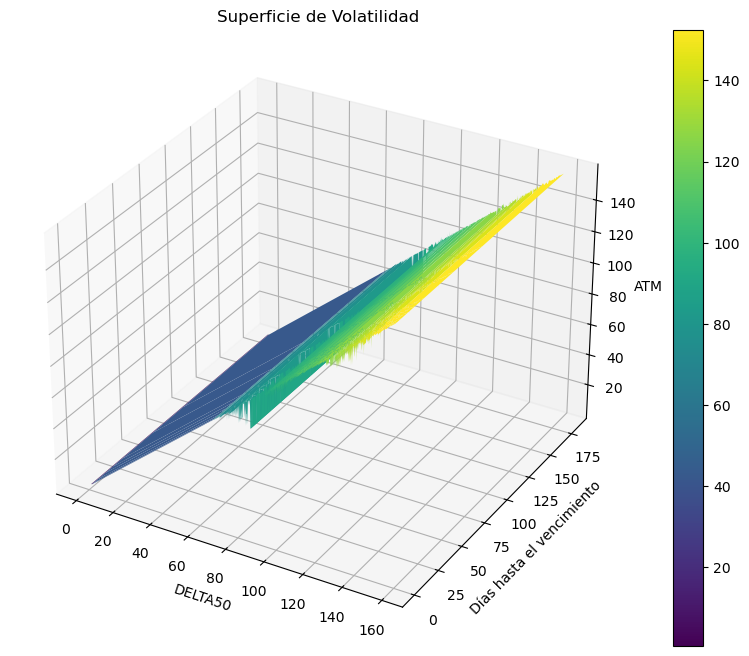

In [38]:
# Crear la superficie 3D de nuevo
X, Y = np.meshgrid(pivot_table_reduced.columns, pivot_table_reduced.index)
Z = pivot_table_reduced.values

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('DELTA50')
ax.set_ylabel('Días hasta el vencimiento')
ax.set_zlabel('ATM')
ax.set_title('Superficie de Volatilidad')

fig.colorbar(surf)
plt.show()


/tmp/ipykernel_5276/762961294.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_table = pivot_table.fillna(method='ffill').fillna(method='bfill')


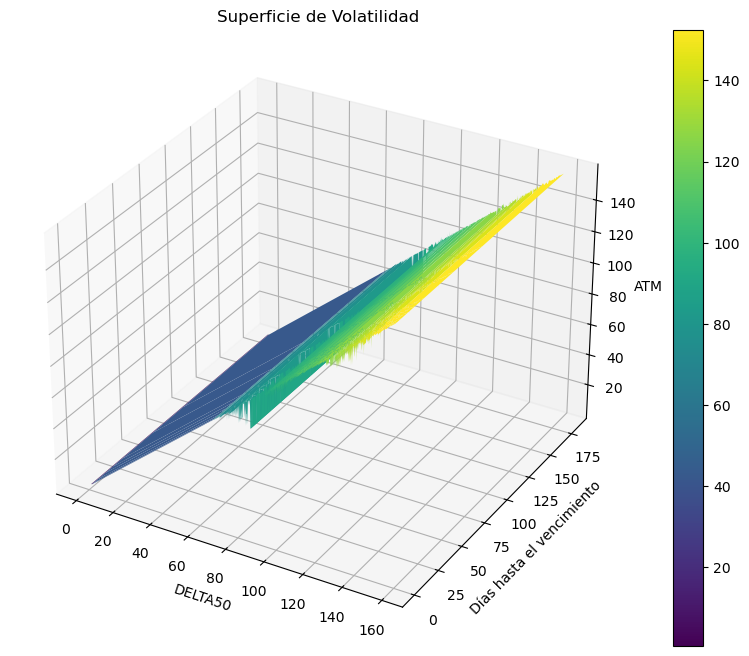

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una tabla pivote
pivot_table = df.pivot_table(values='ATM', index='DAYSTOEXPIRATION', columns='DELTA50')

# Rellenar los valores NaN para mejorar la superficie
pivot_table = pivot_table.fillna(method='ffill').fillna(method='bfill')

# Reducir la cantidad de columnas para hacer el gráfico más manejable
pivot_table_reduced = pivot_table.iloc[:, ::100]  # Toma cada 100 columnas

# Crear las coordenadas para el gráfico
X, Y = np.meshgrid(pivot_table_reduced.columns, pivot_table_reduced.index)
Z = pivot_table_reduced.values

# Crear la figura y la superficie 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir etiquetas y título
ax.set_xlabel('DELTA50')
ax.set_ylabel('Días hasta el vencimiento')
ax.set_zlabel('ATM')
ax.set_title('Superficie de Volatilidad')

# Añadir barra de colores
fig.colorbar(surf)

# Mostrar el gráfico
plt.show()
